In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from kalmanfilter import KalmanFilter
from matplotlib.dates import DateFormatter

In [3]:
plt.style.use('https://gist.githubusercontent.com/Xylambda/4521dc6404594a715bbc7b75e8c1e2e1/raw/f4f466b27955169abd934428ed98c2be2e1201f2/bpyplot')

In [4]:
DATA_PATH = Path(os.path.abspath('')).parent / "tests/data"
ibex = pd.read_pickle(DATA_PATH / "ibex35.pkl")

In [5]:
Z = ibex['Close'].values
A = np.array([[1]])
xk = np.array([[1]])

B = np.array([[0]])
u = np.array([[0]])

Pk = np.array([[1]])
Q = 0.005

H = np.array([[1]])
R = 0.01

In [6]:
kf = KalmanFilter(A=A, xk=xk, B=B, u=u, Pk=Pk, H=H, Q=Q, R=R)
states, errors = kf.run_filter(Z)

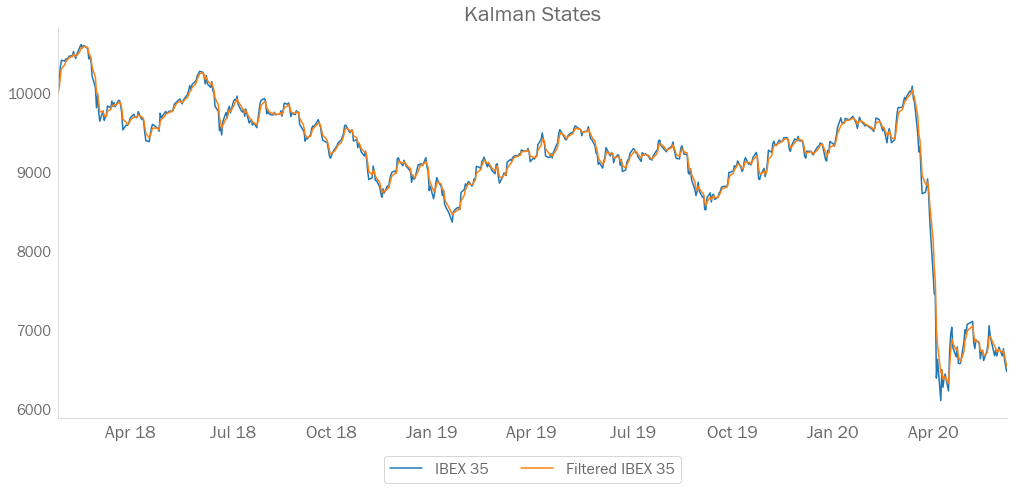

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17,8))

ibex.plot(ax=ax)
ax.plot(ibex.index, states)
ax.legend(['IBEX 35', 'Filtered IBEX 35'], bbox_to_anchor=[0.5, -0.13], loc='center', ncol=2, prop={'size': 16})
ax.set_title("Kalman States", fontsize=22)
ax.set_xlabel("");

date_form = DateFormatter("%b %y")
ax.xaxis.set_major_formatter(date_form)

plt.xticks(rotation=0, fontsize=18);
plt.yticks(fontsize=15);